In [7]:
import pandas as pd
from pandas import HDFStore
import numpy as np


filepath = '/mnt/home/kxs997/Downloads/brfss.hdf5'
brfss = HDFStore(filepath, mode = 'r')

In [8]:

read_data = pd.read_hdf(filepath)
read_data.head()
read_data.shape
read_data.describe


<bound method NDFrame.describe of         SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   
...     ...    ...     ...      ...           ...       ...       ...   
376876  1.0  173.0   97.52      8.0  12018.935300       3.0      5.57   
201499  1.0  170.0   68.04      5.0   1939.162770      13.0      2.71   
192176  1.0  183.0  117.93      4.0    762.342004       8.0      0.53   
342705  1.0  175.0   61.23      5.0   1417.690180       2.0      4.29   
379327  2.0  165.0   77.11      8.0   3062.410900       2.0      3.01   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  

In [9]:
df = pd.read_hdf(filepath)

age = df.get('AGE')
weight = df.get('WTKG3')

In [10]:
!pip install empiricaldist


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12108 sha256=507984a1e1810577884c2eb0642dc527a16160f8d4bfb78f7eefc5b45372ab2a
  Stored in directory: /mnt/home/kxs997/.cache/pip/wheels/9e/6c/a4/6d002e4f35dbe60786322ff8e3032ddab20898164bd3d1c37f
Successfully built empiricaldist


In [12]:
from empiricaldist import Pmf

p_age = Pmf.from_seq(age)
p_weight = Pmf.from_seq(weight)

In [13]:
import matplotlib.pyplot as plt

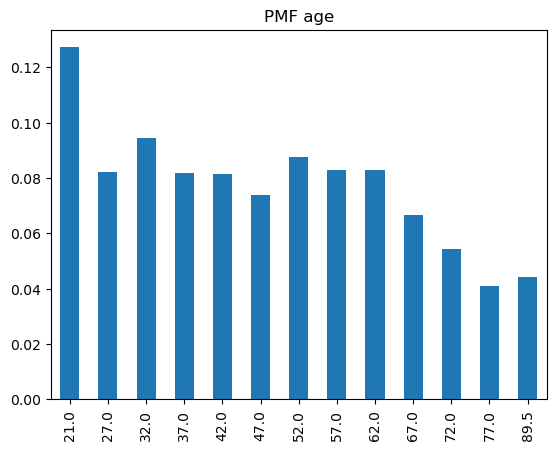

In [19]:
p_age.plot(kind='bar', title='PMF age')
plt.show()

Text(0.5, 1.0, 'weight vs age')

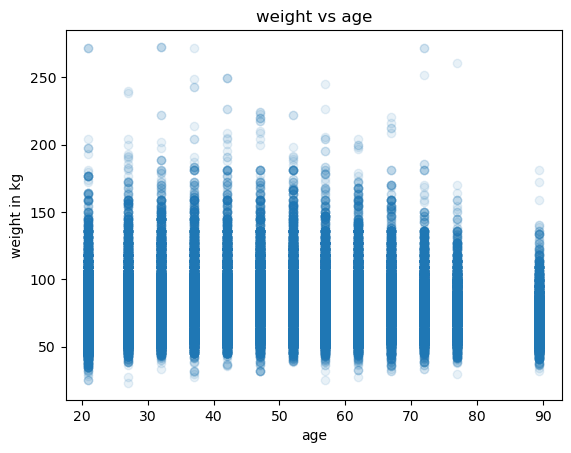

In [22]:
plt.scatter(age, weight, marker = 'o', alpha = 0.1)
plt.xlabel('age')
plt.ylabel('weight in kg')
plt.title('weight vs age')


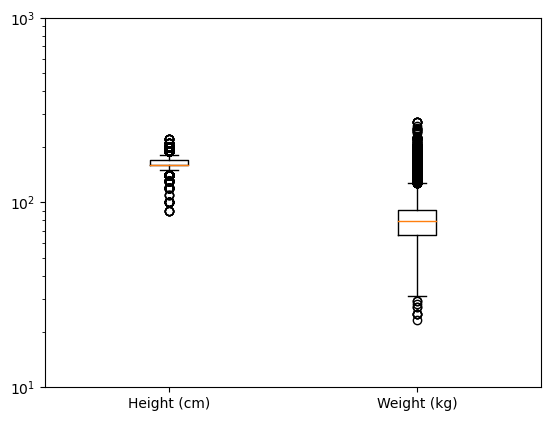

In [28]:
newdf = df.dropna( subset=['_HTMG10', 'WTKG3'] )
heightcm = newdf.get('_HTMG10')
weight2 = newdf.get('WTKG3')


plt.boxplot([heightcm, weight2])
plt.xticks([1, 2], ['Height (cm)', 'Weight (kg)'])
plt.yscale('log')
plt.yticks([10,100,1000])
plt.show()

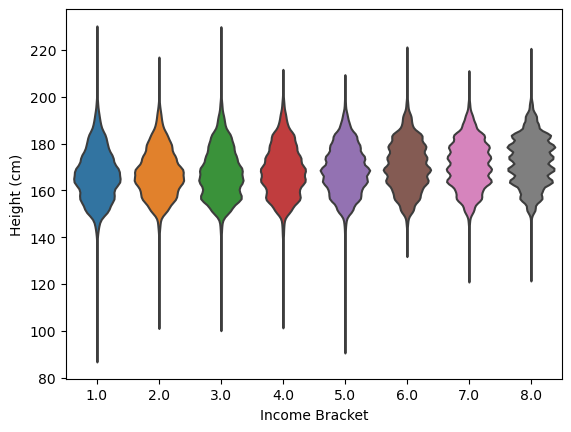

In [34]:
import seaborn as sns

data = df.dropna(subset=['INCOME2','HTM4'])

income = data.get('INCOME2')
height = data.get('HTM4')

sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)
plt.xlabel('Income Bracket')
plt.ylabel('Height (cm)')
plt.show()


In [49]:
data = df.dropna(subset=['AGE', 'INCOME2','_VEGESU1']).head(1000)
corrVals = data[['AGE','INCOME2','_VEGESU1']]
corrVals.corr()



,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.031378,-0.050939
INCOME2,-0.031378,1.000000,0.126032
_VEGESU1,-0.050939,0.126032,1.000000


                            OLS Regression Results                            
Dep. Variable:                INCOME2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.38e-238
Time:                        18:04:36   Log-Likelihood:            -1.6629e+05
No. Observations:               75426   AIC:                         3.326e+05
Df Residuals:                   75424   BIC:                         3.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4507      0.014    378.233      0.0

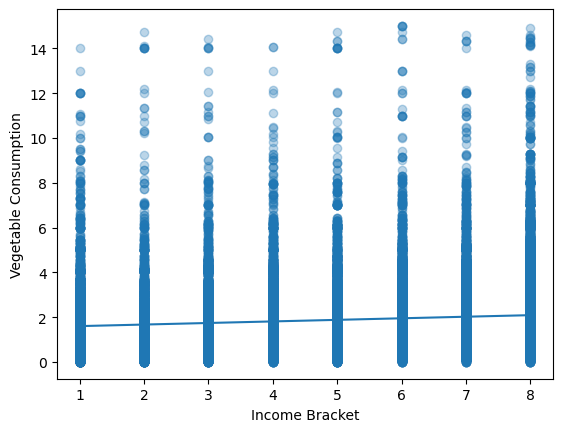

In [69]:
# !pip install statsmodels
import statsmodels.formula.api as smf
from scipy.stats import linregress

subset = df.dropna(subset = ['INCOME2','_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs,ys)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx

plt.scatter(xs, ys, alpha=.3)
plt.xlabel('Income Bracket')
plt.ylabel('Vegetable Consumption')
plt.plot(fx, fy, '-')

results = smf.ols('INCOME2 ~ _VEGESU1', data = subset).fit()
print(results.summary())


In [70]:
from sklearn.manifold import MDS

from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances

import seaborn as sns         

from matplotlib import pyplot as plt

In [72]:
def mapData(dist_matrix, df, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)

    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)

    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1])

    for i, txt in enumerate(pts):
        ax.text(pts[:,0][i], pts[:,1][i], txt)

    ax.set_title(title)

In [79]:
# Reading the Code for each country
cities = pd.read_fwf("/mnt/home/kxs997/Downloads/ha30_code.txt", 
                     skiprows=None, header=0, delimiter='#', names=['Code'])
code = list(cities.Code)
print(code)


['AZ', 'BD', 'BN', 'BY', 'BS', 'CO', 'CN', 'CH', 'GM', 'HU', 'IL', 'JU', 'LN', 'MA', 'ME', 'MY', 'ML', 'MW', 'NS', 'NY', 'PY', 'PS', 'RO', 'RE', 'SF', 'SO', 'SE', 'SI', 'SY', 'TO']


In [96]:
# Reading the distance matrix for the 30 countries
with open("/mnt/home/kxs997/Downloads/ha30_dist.txt", "r") as f:
    distances = [line.split() for line in f]

df = pd.DataFrame(distances[2:])
df.columns = code
idx = pd.Index(code[2:])
df = df.set_index(code)
df.head(30)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AZ,BD,BN,BY,BS,CO,CN,CH,GM,HU,IL,JU,LN,MA,ME,MY,ML,MW,NS,NY,PY,PS,RO,RE,SF,SO,SE,SI,SY,TO
0,39,22,59,54,33,57,32,89,73,29,46,16,83,120,45,24,32,36,25,38,16,43,21,50,57,46,72,121,73
39,0,20,20,81,8,49,64,63,84,10,61,25,49,81,81,58,16,72,60,78,24,69,18,75,88,68,44,83,52
22,20,0,39,74,18,60,44,71,73,11,46,6,61,99,61,37,10,51,40,59,5,62,7,57,78,51,51,100,56
59,20,39,0,93,27,51,81,48,80,30,69,45,32,61,97,75,31,89,78,97,44,83,38,84,100,77,31,63,42
54,81,74,93,0,73,43,56,104,76,76,77,69,111,72,46,56,84,49,53,33,69,12,69,64,7,69,122,73,114
33,8,18,27,73,0,45,61,71,88,8,63,22,57,87,77,54,18,68,56,71,20,61,13,75,80,68,52,90,60
57,49,60,51,43,45,0,85,88,115,52,103,60,75,64,85,79,63,83,78,70,58,38,52,103,49,102,81,69,92
32,64,44,81,56,61,85,0,74,43,55,23,40,81,97,17,8,50,8,7,23,41,53,48,19,53,17,70,92,63
89,63,71,48,104,71,88,74,0,38,69,51,75,16,35,75,77,61,77,80,90,76,116,76,58,98,57,19,33,16


/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


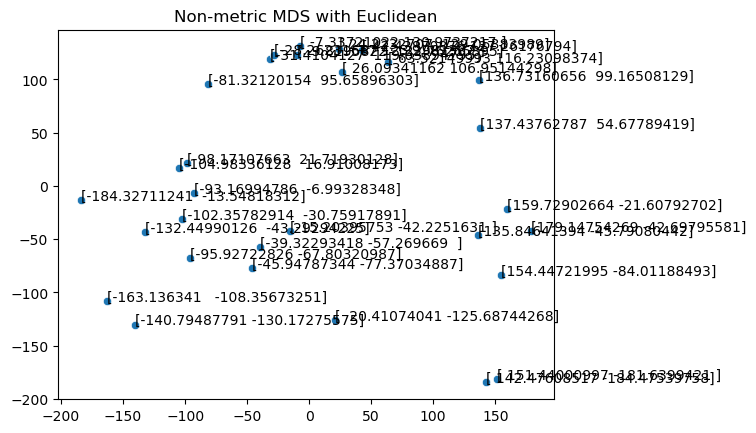

In [97]:
dist_euclid = euclidean_distances(distances[2:])
mapData(dist_euclid, df, True, 'Non-metric MDS with Euclidean')

/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


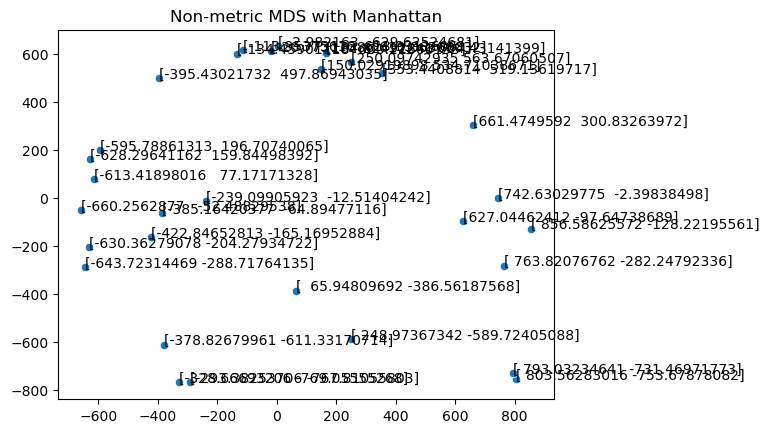

In [99]:
dist_manhattan = manhattan_distances(distances[2:])
mapData(dist_manhattan, df, True, 'Non-metric MDS with Manhattan')

/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


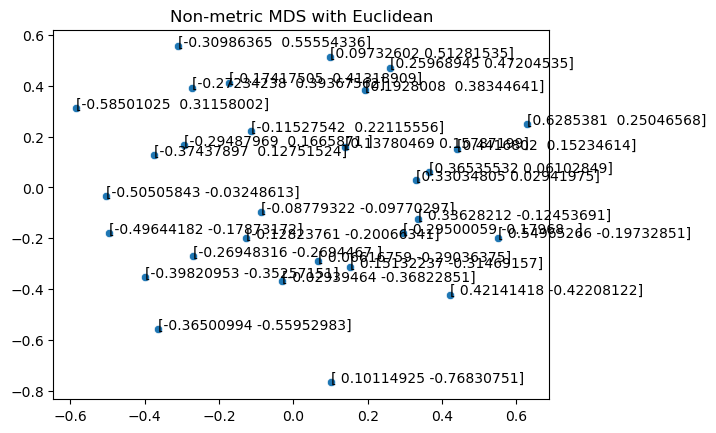

In [100]:
dist_euclid = euclidean_distances(distances[2:])
mapData(dist_euclid, df, False, 'Non-metric MDS with Euclidean')


/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


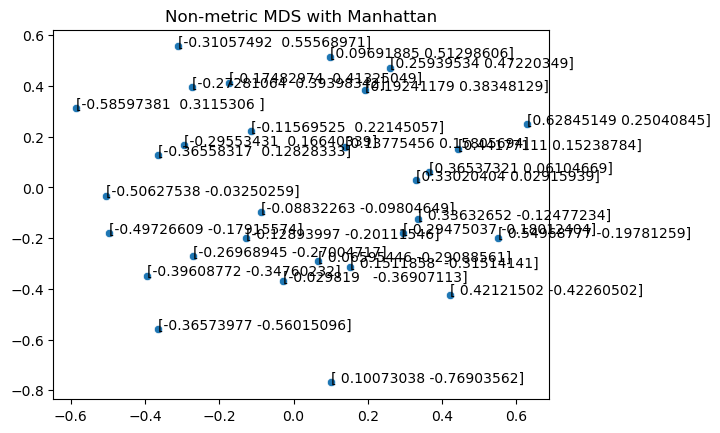

In [101]:
dist_manhattan = manhattan_distances(distances[2:])
mapData(dist_manhattan, df, False, 'Non-metric MDS with Manhattan')